### Visualize overview metabolic pathway in KEGG for novel MAG

In [ ]:
# https://www.genome.jp/brite/htext=ko00001.keg&query=ko01100 (for the ko number in metabolism)
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
from striprtf.striprtf import rtf_to_text
import subprocess

In [45]:
def get_metabolism_ko(rtf):
    # find the carbohydrate metabolism, energy metabolism, etc.
    with open(rtf) as infile:
        content = infile.read()
        text = rtf_to_text(content)
    textl = text.split('\n')
    pid1 = [] # parent metabolism id 1
    pid2 = [] # daughter ko id 2
    for i in range(len(textl)):
        if textl[i].endswith("|") and "PATH" not in textl[i] and "etabolism" in textl[i]: # this is first KO pathway
            pid1.append(i)
        elif 'PATH' in textl[i]: # this is second KO number for pathway
            pid2.append(i)
    pid1 = np.asarray(pid1[1:])
    pid2 = np.asarray(pid2)
    pid3 = []
    for i in range(len(pid1)):
        if i != len(pid1)-1:
            pid3.append(pid2[np.logical_and(pid2>pid1[i],pid2<pid1[i+1])])
        else:
            pid3.append(pid2[pid2>pid1[i]])
    path1 = [textl[i] for i in pid1]
    spath1 = [np.asarray(textl)[i] for i in pid3]# son ko of path1

    path1name = [ re.search(" (.*?)\|",i)[0][1:-1] for i in path1] # the pathway name
    spath1ko = [] # the son ko number
    spath1name = [] # the son EC name
    for i in spath1:
        temp1ko,temp1name = [], []
        for j in i:
            temp1ko.append(re.search("PATH(.*?)\(",j)[0][5:-1])
            temp1name.append(re.search(" (.*?)\[",j)[0][1:-2])

        spath1name.append(temp1name)
        spath1ko.append(temp1ko)
    dict1 = {}
    for i in range(len(path1name)):
        dict1[path1name[i]] = (spath1ko[i],spath1name[i]) # keys: metabolic pathway name, values: son ko, son EC
    return dict1

In [491]:
df

,strain_name,gtdb_name,ppk1,ppk2,ppx,pap,pit,phoU,pstS,pstA_C,pstB,seqppk1,seqppk2,seqppx,seqpap,seqpit,seqphoU,seqpstS,seqpstA_C,seqpstB
0,Methyloglobulus morosus KoM1,Methyloglobulus morosus,1,1,1,0.0,1,1,1,1,1,"(A, T, G, G, C, A, A, A, C, C, T, G, A, C, T, ...","(A, T, G, A, C, A, A, A, A, A, A, A, C, A, A, ...","(A, T, G, C, A, A, A, A, G, A, A, A, C, C, A, ...",0.0,"(A, T, G, A, C, C, A, T, C, G, C, A, C, T, C, ...","(A, T, G, A, A, T, A, A, C, A, C, G, A, G, C, ...","(A, T, G, A, A, A, C, C, A, A, T, T, T, T, T, ...","(A, T, G, A, T, A, G, C, G, T, C, T, T, G, G, ...","(A, T, G, A, A, T, T, C, T, A, T, C, T, T, A, ..."
1,Methyloprofundus sedimenti,Methyloprofundus sedimenti,1,1,1,1,1,1,1,1,1,"(A, T, G, G, C, A, G, A, A, A, A, T, A, C, A, ...","(A, T, G, G, A, T, T, A, T, C, G, T, A, A, A, ...","(A, T, G, A, C, T, C, A, G, A, C, T, A, C, T, ...","(A, T, G, T, T, T, G, A, A, A, T, C, G, C, T, ...","(A, T, G, A, C, T, G, A, A, A, T, C, C, A, A, ...","(A, T, G, G, A, A, A, A, A, A, A, A, C, A, T, ...","(G, T, G, A, A, A, A, A, A, A, C, A, G, G, C, ...","(A, T, G, T, C, T, A, A, A, G, A, T, A, G, C, ...","(A, T, G, A, A, G, C, C, C, A, T, A, T, T, T, ..."
2,Methylomonas rhizoryzae,Methylomonas rhizoryzae,1,0.0,1,1,0.0,1,1,1,1,"(A, T, G, G, A, C, A, A, C, A, C, A, G, C, A, ...",0.0,"(T, T, G, C, C, A, A, A, T, G, C, C, A, T, A, ...","(G, T, G, T, T, T, G, A, G, G, T, A, G, C, T, ...",0.0,"(A, T, G, A, C, G, C, A, A, C, A, C, A, C, A, ...","(A, T, G, T, C, T, T, A, T, C, T, A, T, T, T, ...","(A, T, G, A, T, T, A, A, G, G, C, A, T, G, G, ...","(A, T, G, A, C, A, A, C, T, G, A, A, G, T, A, ..."
3,Methyloterricola oryzae,Methyloterricola oryzae,1,1,0.0,1,0.0,1,1,1,1,"(T, T, G, A, T, C, A, T, C, A, A, C, A, G, T, ...","(A, T, G, A, A, G, A, A, A, G, A, C, C, G, C, ...",0.0,"(A, T, G, T, T, T, G, A, A, G, T, C, G, C, T, ...",0.0,"(A, T, G, T, C, T, G, A, G, T, T, C, C, C, G, ...","(A, T, G, A, A, G, A, A, T, A, C, A, T, T, A, ...","(A, T, G, C, A, A, A, A, A, T, C, C, A, C, C, ...","(G, T, G, A, G, T, G, A, G, G, C, T, C, A, C, ..."
4,Methylosarcina lacus LW14,Methylomicrobium lacus,1,1,1,0.0,1,1,1,1,1,"(A, T, G, G, A, C, C, C, C, A, C, C, G, C, C, ...","(A, T, G, G, A, A, A, A, G, C, A, A, A, G, A, ...","(G, T, G, C, C, A, A, A, A, A, C, A, T, T, A, ...",0.0,"(A, T, G, C, T, G, A, C, T, C, T, G, C, T, C, ...","(A, T, G, G, A, C, A, G, C, A, A, T, A, A, A, ...","(A, T, G, T, C, C, T, T, T, C, T, G, T, T, T, ...","(A, T, G, A, T, C, A, A, G, T, T, A, T, G, G, ...","(A, T, G, A, C, A, T, C, A, C, A, A, C, A, A, ..."
5,Methylotetracoccus oryzae,Methylotetracoccus oryzae,1,1,0.0,1,0.0,1,1,1,1,"(T, T, G, A, T, C, A, T, C, A, G, C, G, A, C, ...","(A, T, G, G, C, G, C, A, A, G, T, A, A, A, A, ...",0.0,"(A, T, G, T, T, T, G, A, A, T, T, G, G, C, G, ...",0.0,"(G, T, G, A, C, C, G, T, C, C, G, C, A, G, C, ...","(G, T, G, A, G, C, A, T, C, C, G, T, C, C, G, ...","(G, T, G, G, A, C, A, A, G, C, C, C, A, C, T, ...","(A, T, G, G, T, C, T, G, T, C, G, G, G, A, T, ..."
6,Methylotuvimicrobium alcaliphilum 20Z,Methylotuvimicrobium alcaliphilum,1,0.0,1,1,1,1,1,1,1,"(A, T, G, A, A, T, A, C, A, C, A, A, A, G, C, ...",0.0,"(G, T, G, C, C, T, C, A, A, A, A, A, A, T, A, ...","(A, T, G, T, T, T, G, A, A, A, T, T, G, C, C, ...","(A, T, G, G, A, T, C, T, T, A, A, C, G, A, C, ...","(A, T, G, A, A, A, G, A, A, C, A, T, A, C, G, ...","(A, T, G, A, C, T, T, T, C, A, A, A, T, T, C, ...","(A, T, G, A, A, T, A, A, T, C, G, G, A, C, T, ...","(A, T, G, G, G, C, G, C, G, A, C, A, G, T, A, ..."
7,Methylovulum miyakonense HT12,Methylovulum miyakonense,1,1,1,0.0,0.0,1,1,1,1,"(A, T, G, G, A, T, A, T, C, A, A, C, C, C, G, ...","(A, T, G, A, A, A, A, T, A, C, A, T, A, G, C, ...","(G, T, G, C, A, A, A, A, G, A, A, A, C, C, A, ...",0.0,0.0,"(A, T, G, G, A, T, A, A, C, A, G, T, A, A, A, ...","(A, T, G, G, A, T, A, A, G, C, A, T, C, C, G, ...","(A, T, G, A, T, T, A, A, A, G, A, A, T, G, G, ...","(A, T, G, A, C, A, G, C, A, C, A, A, G, A, A, ..."
8,Methylomonas denitrificans,Meth

In [61]:
dict1 = get_metabolism_ko('metabolismpathway.rtf')
if not os.path.exists("metabolism"):
    os.mkdir("metabolism")
for k,v in dict1.items():
    f = open("metabolism/{}.txt".format(k),'w')
    v = v[0]
    v = '\n'.join(v)
    print(v,file=f)
    f.close()

In [ ]:
for k,v in dict1.items():
    for ko in v[0]:
        subprocess.check_output(["curl", "-o", "metabolism/%s.%s.txt" % (k, ko), "https://rest.kegg.jp/link/ko/" + ko])
        time.sleep(2)

In [173]:
# For each metabolism, get all K00123 numbers, assign color
color = ["#000000","#FFFFFF","#FF0000","#00FF00","#0000FF","#FFFF00","#00FFFF","#FF00FF","#808080","#800000",\
        "#808000","#008000"]
dict_cm = {} # dictionary to save metabolism and color
if not os.path.exists("kos/"):
    os.makedirs("kos/")
for i, metabolism in enumerate(list(dict1.keys())):
    dict_cm[metabolism] = color[i]
    with open("kos/"+metabolism + ".kos", "bw") as fp:
        ret = subprocess.check_output(["cut", "-f2"] +\
                                      ["./metabolism/%s.%s.txt" % (metabolism, ko) for ko in dict1[metabolism][0]])
        derep = set(ret.split(b"\n"))
        for t in sorted(derep)[1:]:
            fp.write(b"%s\t%s,%s\n" % (t, color[i].encode("ascii"), color[i].encode("ascii")))

In [174]:
# cat all .kos
subprocess.run("cat kos/*.kos > totalkos",shell=True)

CompletedProcess(args='cat kos/*.kos > totalkos', returncode=0)

In [175]:
totalkos = list()
with open("totalkos",'r') as f:
    for line in f:
        line = line.rstrip()
        ko, color = line.split("\t")
        totalkos.append((ko.replace("ko:", ""), color))

In [176]:
# remove the K001322 number not in bin0
with open("ko_bin0.txt",'r') as f:
    bin0 = f.readlines()[0].split(", ")
    bin0 = [i.replace("\n","") for i in bin0]
    bin0 = set(bin0)

# filter
filtered_kos = filter(lambda x: x[0] in bin0, totalkos)
with open("totalkos.filtered", "w") as f:
    for i in filtered_kos:
        print("%s\t%s" % i, file = f)

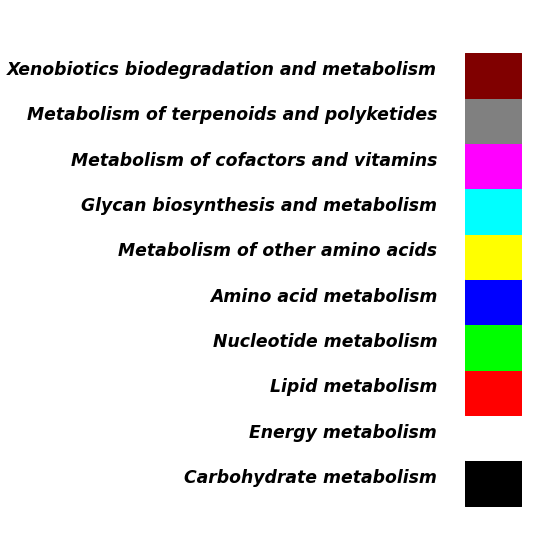

In [213]:
# plot dict_cm
fig, ax = plt.subplots(1,1,figsize=(2,10))
plt.axis('off') 
x1, x2 = 0, 1
k = list(dict_cm.keys())#keys
ax.set_xlim((-.5,1.5))
ax.set_ylim((-1,11))

for i in np.arange(len(k)):
    ax.fill_between((x1,x2),i,i+1,color=dict_cm[k[i]])
    ax.text(x1-.5,i+.5,k[i],ha='right',fontweight='bold',fontsize='xx-large',fontstyle='italic')
fig.savefig('../Label.png',bbox_inches='tight',quality=300)